<a href="https://colab.research.google.com/github/bensalahmohameed/dogs-cats/blob/master/CatsVsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
%pwd

'/content/drive/My Drive/projetDL'

In [64]:
#Importing necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [65]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [66]:
import tensorflow as tf
from tensorflow import keras

## **Dataset containing 4000 pictures of cats and dogs (2000 cats, 2000 dogs). We will use 2000 pictures for training, 1000 for validation, and finally 1000 for testing**

In [67]:
train_dir = r'/content/drive/MyDrive/projetDL/data/train'  # Location of training images
validation_dir = r'/content/drive/MyDrive/projetDL/data/validation' #Location of validation images
test_dir =r'/content/drive/MyDrive/projetDL/data/test' #Location of test images

# 

# I. MY MODEL

### Data Preprocessing

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [69]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [70]:
def plots(ims, figsize=(16,16), rows=4, interp=False, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

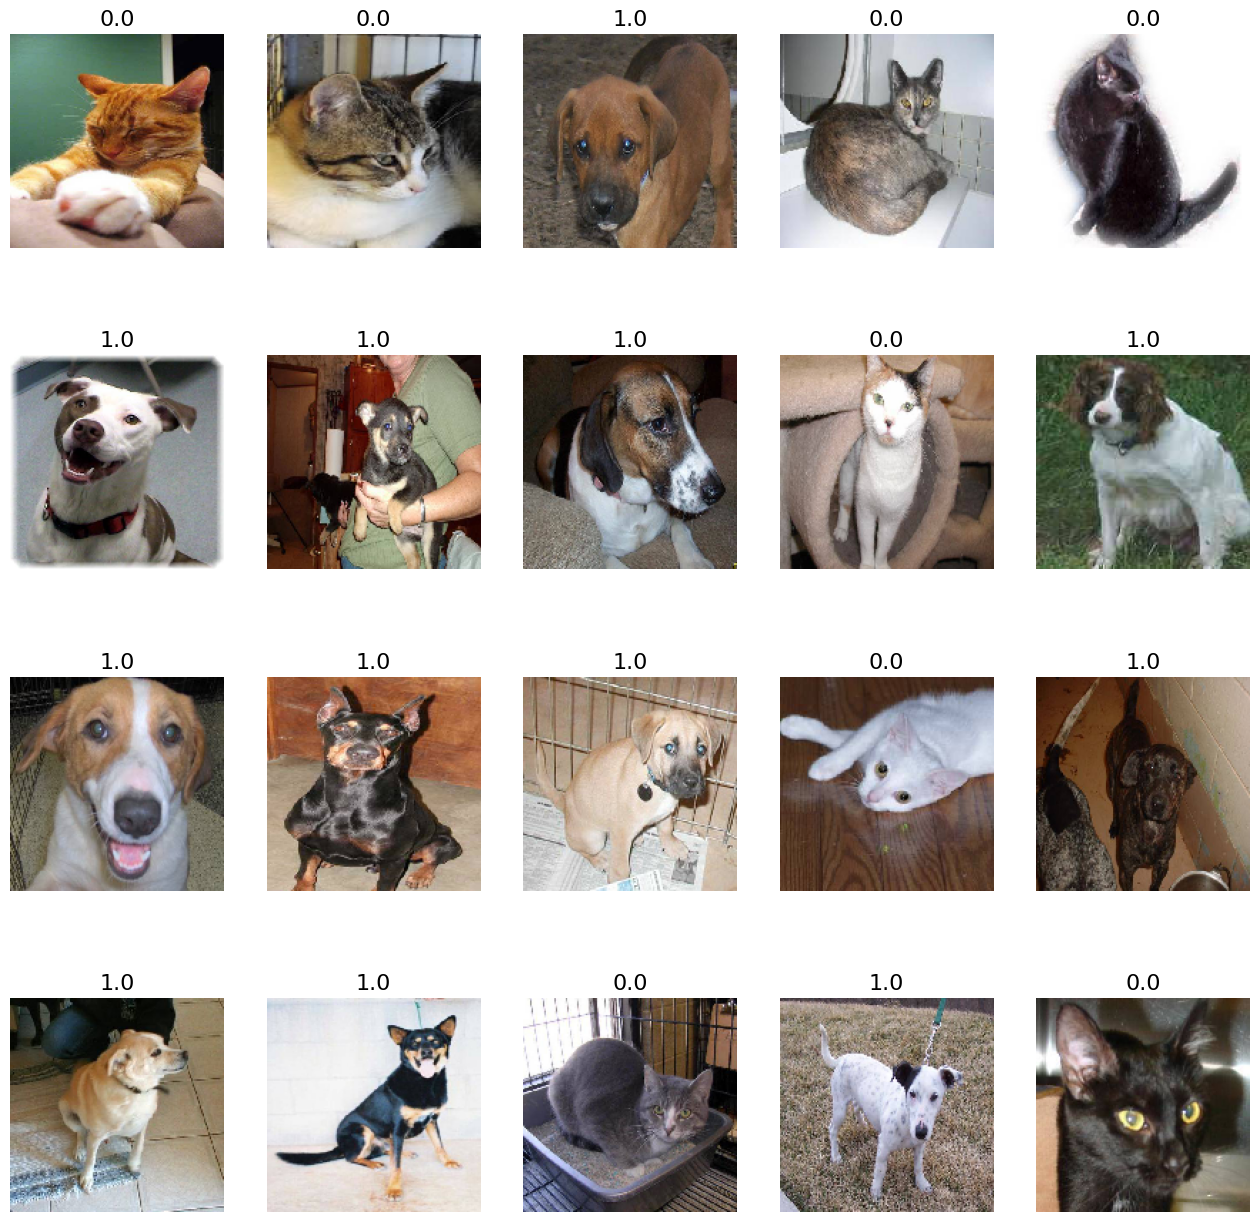

In [71]:
imgs, labels = next(train_generator)
plots(imgs, titles=labels)

## As we can see cats are label 0 whereas dogs are label 1

In [72]:
class_names = ['Cat','Dog'] #Creating a dictionary of class names according to the label

### MODEL ARCHITECTURE

In [73]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

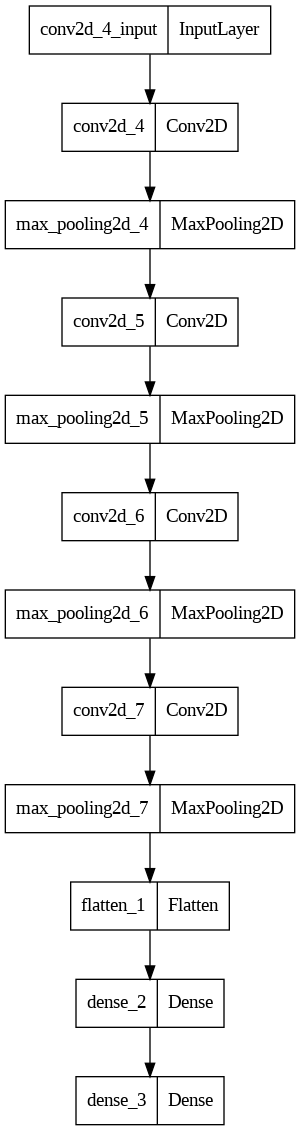

In [74]:
#Plotting a graphical representation of the model
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot

keras.utils.plot_model(model)

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [76]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',                 #Since we have two classes I am using a binary cross entropy
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

* **For calculation of steps per epoch :**
  **Our train_generator is feeding data in batchs of 20 and the size of out test set is 2000
  hence maximum steps_per_epoch = 2000/20 = 100, for this value the whole data set will be feeded.**
* **Similarly for validation steps, our validation set is of size 1000 and we have a batch size of 20,
  thus maximum validation_steps = 50**

## TRAINING

In [77]:
history = model.fit_generator(    #Feeding the data from iterator into the model using fit_generator() method
  train_generator,
  steps_per_epoch=100,            
  epochs=20,
  validation_data=validation_generator,
  validation_steps=50)

<ipython-input-77-9187ff8fe5a6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(    #Feeding the data from iterator into the model using fit_generator() method


Epoch 1/20
100/100 [==============================] - 587s 6s/step - loss: 0.7353 - acc: 0.5185 - val_loss: 0.6900 - val_acc: 0.5400
Epoch 2/20
100/100 [==============================] - 15s 153ms/step - loss: 0.6850 - acc: 0.5605 - val_loss: 0.6516 - val_acc: 0.6380
Epoch 3/20
100/100 [==============================] - 15s 149ms/step - loss: 0.6489 - acc: 0.6460 - val_loss: 0.6330 - val_acc: 0.6440
Epoch 4/20
100/100 [==============================] - 15s 148ms/step - loss: 0.6000 - acc: 0.6765 - val_loss: 0.6019 - val_acc: 0.6870
Epoch 5/20
100/100 [==============================] - 15s 148ms/step - loss: 0.5501 - acc: 0.7225 - val_loss: 0.6608 - val_acc: 0.6540
Epoch 6/20
100/100 [==============================] - 15s 150ms/step - loss: 0.5069 - acc: 0.7500 - val_loss: 0.5702 - val_acc: 0.7050
Epoch 7/20
100/100 [==============================] - 15s 148ms/step - loss: 0.4508 - acc: 0.7945 - val_loss: 0.5973 - val_acc: 0.7160
Epoch 8/20
100/100 [==============================] - 16s

## After training:
* **Validation accuracy:72.8%**
* **Training accuracy:92.55%**

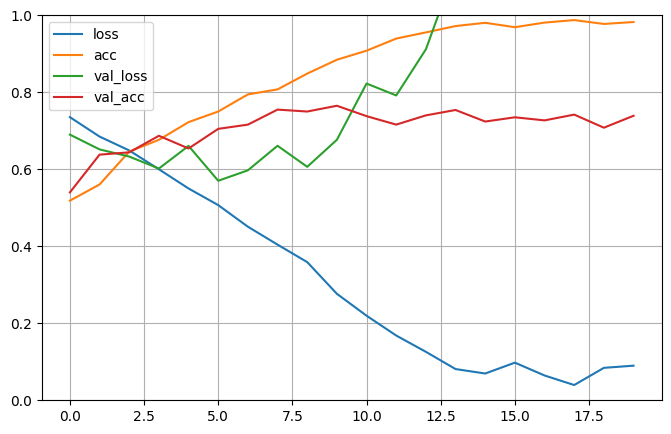

In [78]:
pd.DataFrame(history.history).plot(figsize=(8, 5))  #Plotting the model history by converting the data of epochs into a DataFrame
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## TESTING 

### **Now we will test our model on the test set**

In [79]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


1/1 [==============================] - 0s 20ms/step


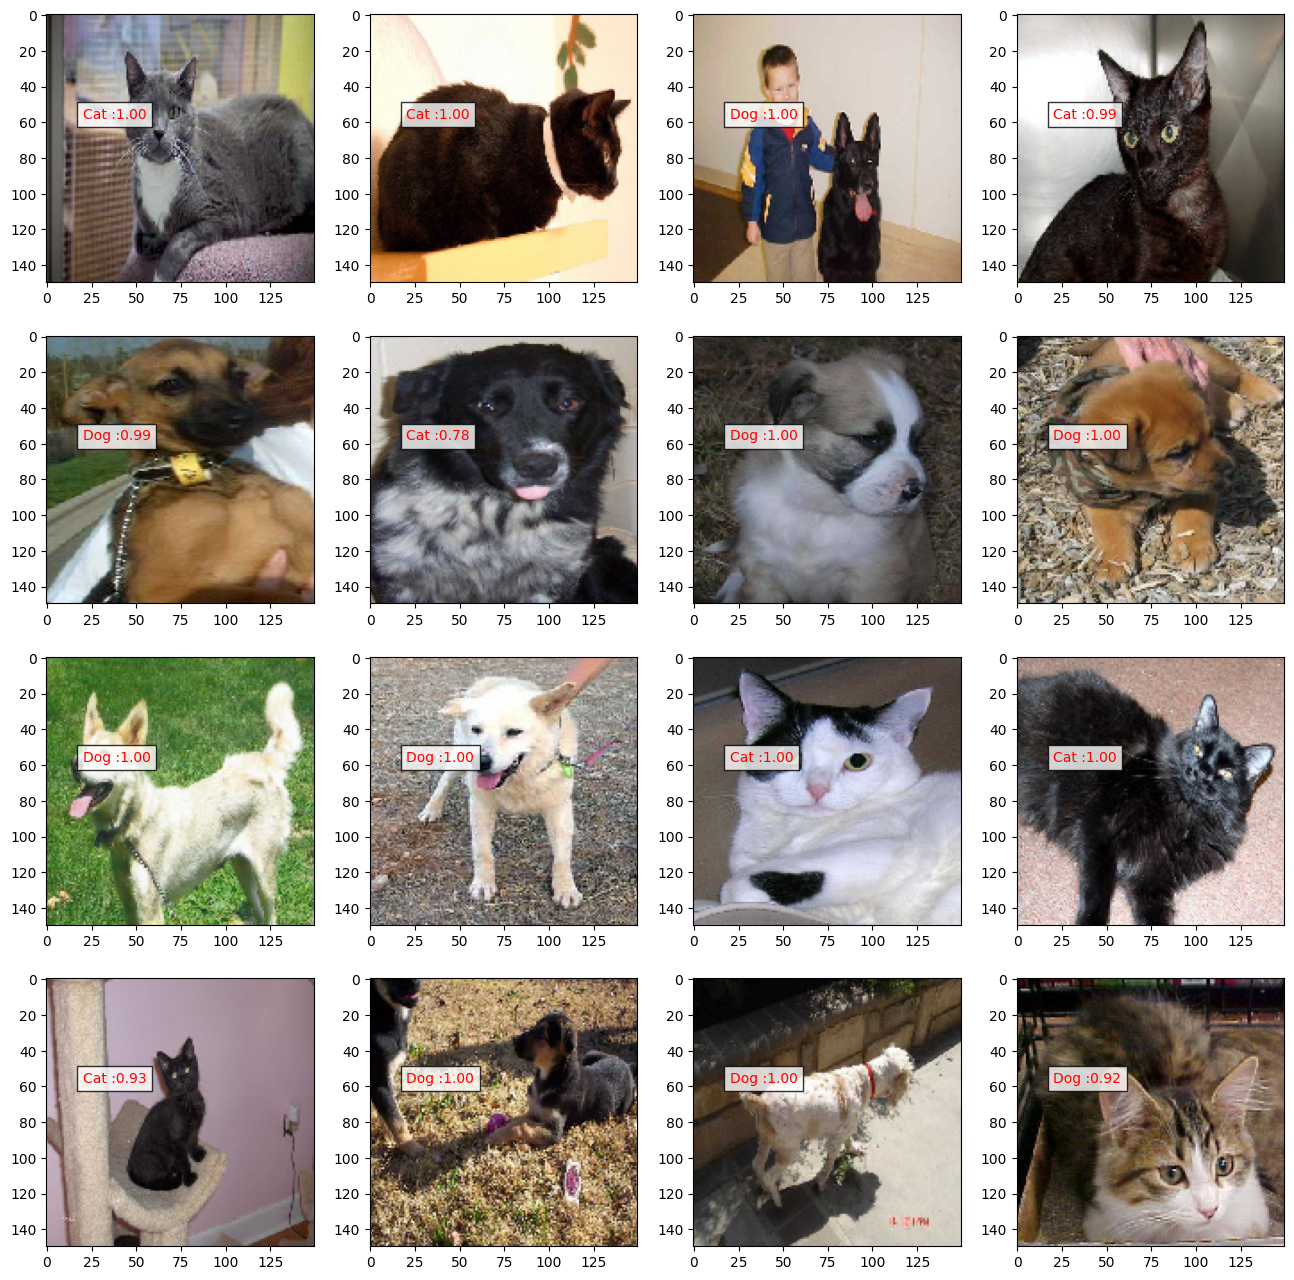

In [80]:
imgs, labels = next(test_generator)
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t= np.expand_dims(imgs[i], axis=0)
    prediction = model.predict(img_t) 
    if(prediction[:,:]>0.5):
        value ='Dog :%.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%.2f'%(1-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])

In [81]:
model.evaluate_generator(test_generator, steps=50)

<ipython-input-81-83d4f6cbdea5>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, steps=50)


[2.220623731613159, 0.7099999785423279]

### **As we can see we get a testing accuracy of 70.99%**

### Now we will test our model on random cat and dog images from the internet

**There are many methods in which you can view your images in python:**
* Open CV
* keras.preprocessing
* Pillow Library
* many more... (which I have not discovered yet)

**I am testing my model on two random images from the net, I will be showing ways to preprocess images using keras and pillow library, openCV is also a popular and very efficient method but the other two methdos are also pretty good and can perform simple operations on images, while OpenCV is dedicated for Vision and advanced processing of images, you can easliy get the implementation using OpenCV on the net, but I have not it in this project.**

**We are using binary cross entropy as the loss, our class0 is Cat and class1 is Dog. The output if the function will be between 0 &1.**
* If the output of the model is closer to 0 it is a Cat
* If the output of the model is closer to 1 it is a Dog

## Using Keras preprocessing

In [118]:
from keras.preprocessing import image

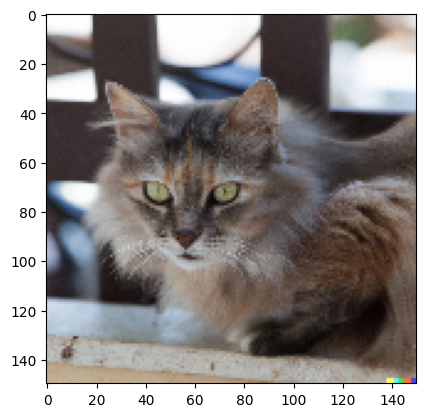

In [119]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Load the image
img = load_img('/content/drive/MyDrive/projetDL/DALL.E_real_cat.png', target_size=(150, 150)) #resizing and loading the image load_img method of keras

# Show the image using matplotlib
plt.imshow(img)
plt.show()      #imshow is a method of matplotlib for viewing images       

As seen above this is an image generated by DALL.E for a cat and hence I expect the model to predict this image belonging to class Cat with a high confidence, also given that the accuracy was just 72%.

In [120]:
from tensorflow.keras.preprocessing.image import img_to_array


In [121]:
test_image = img_to_array(img)  #Converting the jpg file to array of pixels
test_image.shape   #Checking the shape of image

(150, 150, 3)

In [122]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 150, 150, 3)

1/1 [==============================] - 0s 21ms/step
Predicted value: [[0.]]


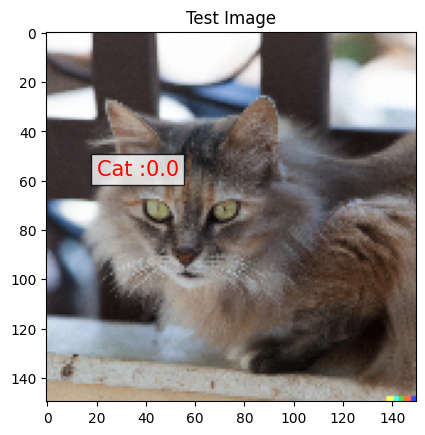

In [123]:
pred=model.predict(test_image)             #Predicting the output
print("Predicted value: {}".format(pred))
pred=pred.round()                          #Rounding off the output to nearest class 0 or 1
plt.title('Test Image')
value ='{} :{}'.format(class_names[int(pred)],pred[0,0])  #getting the class name from dictionary
plt.text(20, 58,value,color='red',fontsize=15,bbox=dict(facecolor='white',alpha=0.8)) #Displaying the class along with class value
plt.imshow(img)                                                                        

**As we can see this model predicts this image as a cat with 100% confidence, as the label for cat is 0 and the predicted value id also 0!!**

## USING PILLOW(Python Imaging Library)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=926x615 at 0x7FC26A2B9900>


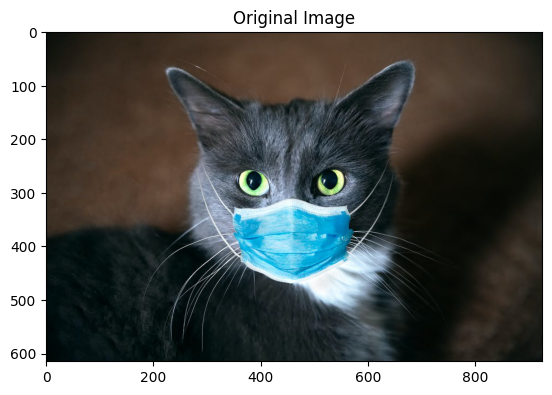

In [124]:
from PIL import Image
img=Image.open('/content/drive/MyDrive/projetDL/cat.jpg')     #The open method will just identify the image but the file image data is not read,indeed a lazy function!
print(img)
plt.title('Original Image')
plt.imshow(img)               #Hence we will plot the image using imshow method from matplotlib 

As seen above this is an image of a cat wearing a mask generated by DALL.E! I expect the model to predict it as a cat with high confidence 


**PIL library has many more fucntions like rotate, alpha, blend etc for performing operations on image.**

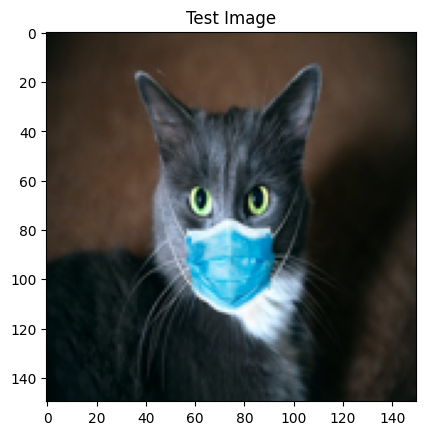

In [125]:
new_img=img.resize((150,150)) #Resizing the image using resize() method of PIL library
new_img.save('cat_new.jpg')   #Saving the resized image
plt.title('Test Image')
plt.imshow(new_img)   

As you can see in above two cells I have used plt.imshow() to plot the images, I have merely passed PIL Image object to it. The imshow() method can take an array of pixels or a PIL Image as input. Previously we had used expand dims to add the new axis representing the batch size, here I will be implementing that using array indexing but for that I need to convert my Image into an array, for that I will be using the imread() method.

In [126]:
new_img = plt.imread('cat_new.jpg')
new_img=new_img/255.
new_img=new_img[np.newaxis,:,:,:]
new_img.shape

(1, 150, 150, 3)

1/1 [==============================] - 0s 45ms/step
Predicted value: [[0.]]


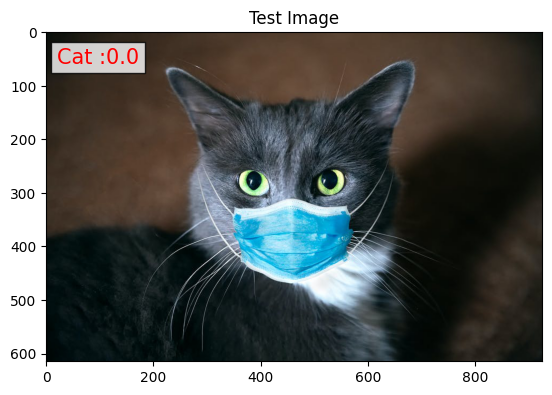

In [128]:
pred=model.predict(test_image)             #Predicting the output
print("Predicted value: {}".format(pred))
pred=pred.round()                          #Rounding off the output to nearest class 0 or 1
plt.title('Test Image')
value ='{} :{}'.format(class_names[int(pred)],pred[0,0])  #getting the class name from dictionary
plt.text(20, 58,value,color='red',fontsize=15,bbox=dict(facecolor='white',alpha=0.8)) #Displaying the class along with class value
plt.imshow(img) 

**As we can see this model predicts this image as a cat with 97% confidence, as the label for Cat is 0 and the predicted value is 0.03. This is a pretty good result but we should train our model to avoid that 3% error as well. Ideally the output should be 0 as Cat belongs to class 0.**

**Basically the model predcits the image as 97% Cat and 3 % Dog!**